<a href="https://colab.research.google.com/github/leandroromano/videogamesanalysis/blob/main/GameAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
import datetime
import numpy as np


# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

def zero_padding(table, platform_used, start_year, final_year):
  for year in range(start_year, final_year):
    if datetime.datetime(year, 1, 1) not in table.index:
      table.at[datetime.datetime(year, 1, 1), 'Platform'] = 0
      table.at[datetime.datetime(year, 1, 1), 'Platform_Used'] = platform_used


# Download a file based on its file ID.
#
# A file ID looks like: 1uUgj9Ao-5lCUUB3iCQiCr1AO4qPYgKD1
# https://drive.google.com/file/d/1uUgj9Ao-5lCUUB3iCQiCr1AO4qPYgKD1/view?usp=sharing
file_id = '1uUgj9Ao-5lCUUB3iCQiCr1AO4qPYgKD1'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('Video_Games.csv')
df3 = pd.read_csv('Video_Games.csv', parse_dates=['Year_of_Release'])
platforms = df3['Platform'].unique()
print(platforms)
frames = []
for platform in platforms:
  is_platform = df3['Platform'] == 'platform'
  platform_table = df3[is_platform][['Platform', 'Year_of_Release']]
  count_table = platform_table.groupby('Year_of_Release').count()
  count_table['Platform_Used'] = platform
  zero_padding(count_table, platform, 1980, 2017)
  count_table = count_table.sort_index()
  frames.append(count_table)


['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


In [ ]:
df3.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006-01-01,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008-01-01,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009-01-01,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


Platform_Used
2600    AxesSubplot(0.125,0.125;0.775x0.755)
3DO     AxesSubplot(0.125,0.125;0.775x0.755)
3DS     AxesSubplot(0.125,0.125;0.775x0.755)
DC      AxesSubplot(0.125,0.125;0.775x0.755)
DS      AxesSubplot(0.125,0.125;0.775x0.755)
GB      AxesSubplot(0.125,0.125;0.775x0.755)
GBA     AxesSubplot(0.125,0.125;0.775x0.755)
GC      AxesSubplot(0.125,0.125;0.775x0.755)
GEN     AxesSubplot(0.125,0.125;0.775x0.755)
GG      AxesSubplot(0.125,0.125;0.775x0.755)
N64     AxesSubplot(0.125,0.125;0.775x0.755)
NES     AxesSubplot(0.125,0.125;0.775x0.755)
NG      AxesSubplot(0.125,0.125;0.775x0.755)
PC      AxesSubplot(0.125,0.125;0.775x0.755)
PCFX    AxesSubplot(0.125,0.125;0.775x0.755)
PS      AxesSubplot(0.125,0.125;0.775x0.755)
PS2     AxesSubplot(0.125,0.125;0.775x0.755)
PS3     AxesSubplot(0.125,0.125;0.775x0.755)
PS4     AxesSubplot(0.125,0.125;0.775x0.755)
PSP     AxesSubplot(0.125,0.125;0.775x0.755)
PSV     AxesSubplot(0.125,0.125;0.775x0.755)
SAT     AxesSubplot(0.125,0.125;0.775x0.7

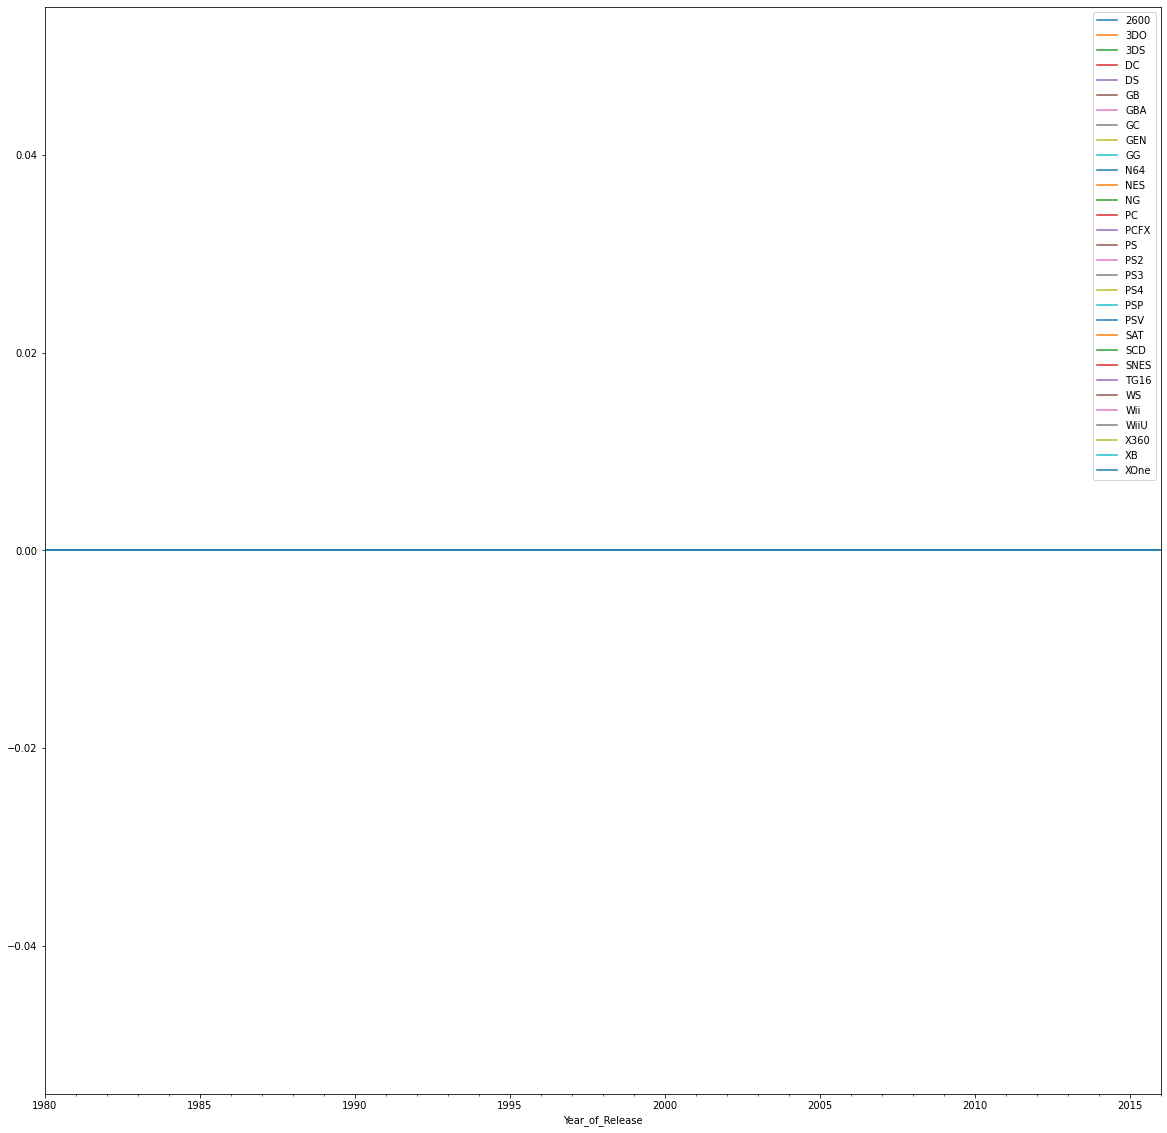

In [ ]:
joined_dataframes = pd.concat(frames)
# joined_dataframes = joined_dataframes.set_index('Year_of_Release')
joined_dataframes.groupby('Platform_Used')['Platform'].plot(legend=True, figsize=(20,20))

In [ ]:
df3.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

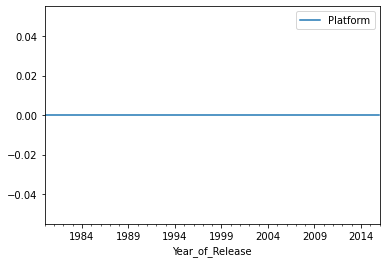

In [ ]:
grouped_dataframes = joined_dataframes.groupby('Platform_Used')
wii_releases_yearly = joined_dataframes[joined_dataframes.Platform_Used == 'Wii']

wii_releases_monthly = wii_releases_yearly.resample('M').bfill()
wii_releases_monthly.plot()

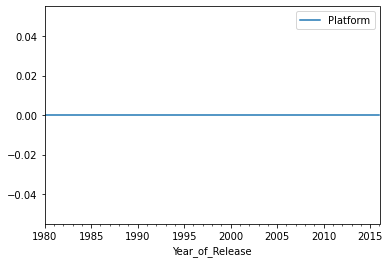

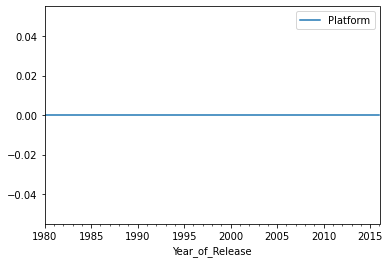

In [ ]:
ps3_releases_yearly = joined_dataframes[joined_dataframes.Platform_Used == 'PS3']

ps3_releases_yearly.plot()
wii_releases_yearly.plot()


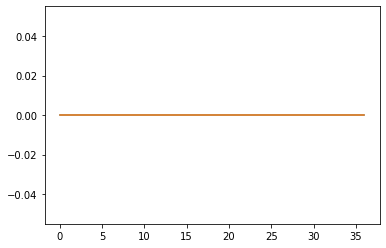

In [ ]:
wii_ps3_convolution = np.convolve(wii_releases_yearly['Platform'].to_numpy(), ps3_releases_yearly['Platform'].to_numpy(), mode = 'same')

import matplotlib.pyplot as plt

plt.plot(np.arange(37), wii_ps3_convolution)
plt.plot(np.arange(37), wii_releases_yearly['Platform'].to_numpy())

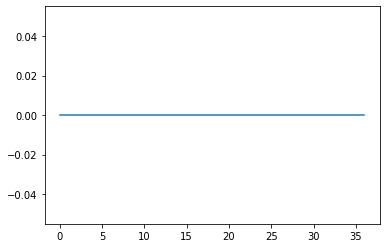

In [ ]:
wii_ps3_correlation = np.correlate(ps3_releases_yearly['Platform'].to_numpy(), wii_releases_yearly['Platform'].to_numpy(), mode = 'same')

plt.plot(np.arange(37), wii_ps3_correlation)

In [ ]:
combined = wii_releases_yearly.assign(ps3=ps3_releases_yearly['Platform'])

combined[['Platform', 'ps3']].corr()



# pd.DataFrame({ 'ps3_releases_yearly': ps3_releases_yearly['Platform'] })

,Platform,ps3
Platform,NaN,NaN
ps3,NaN,NaN


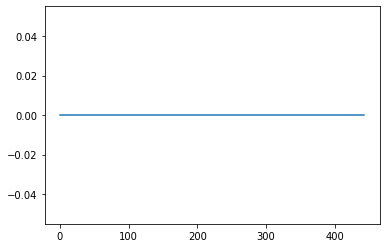

In [ ]:
from scipy import signal

# plt.plot(np.arange(73), signal.correlate(ps3_releases_yearly['Platform'].to_numpy(), ps3_releases_yearly['Platform'].to_numpy(), mode='same', method = 'direct'))
wii_releases_monthly = signal.resample(wii_releases_yearly['Platform'].to_numpy(), 444)
plt.plot(np.arange(444), wii_releases_monthly)

In [ ]:
def zero_padding_publisher(table, publisher_creator, start_year, final_year):
  for year in range(start_year, final_year):
    if datetime.datetime(year, 1, 1) not in table.index:
      table.at[datetime.datetime(year, 1, 1), 'Publisher'] = 0
      table.at[datetime.datetime(year, 1, 1), 'Publisher_Creator'] = publisher_creator



In [ ]:
df4 = pd.read_csv('Video_Games.csv', parse_dates=['Year_of_Release'])
publishers = df4['Publisher'].unique()
print(publishers)
publisher_frames = []
total_releases_frames = []
for publisher in publishers:
  is_publisher = df4['Publisher'] == publisher
  publisher_table = df4[is_publisher][['Publisher', 'Year_of_Release']]
  count_table_publisher = publisher_table.groupby('Year_of_Release').count()
  total_releases_table_publisher = publisher_table.groupby('Publisher').count()
  count_table_publisher['Publisher_Creator'] = publisher
  zero_padding_publisher(count_table_publisher, publisher, 1980, 2020)
  count_table_publisher = count_table_publisher.sort_index()
  publisher_frames.append(count_table_publisher)
  total_releases_frames.append(total_releases_table_publisher)


['Nintendo' 'Microsoft Game Studios' 'Take-Two Interactive'
 'Sony Computer Entertainment' 'Activision' 'Ubisoft' 'Bethesda Softworks'
 'Electronic Arts' 'Sega' 'SquareSoft' 'Atari' '505 Games' 'Capcom'
 'GT Interactive' 'Konami Digital Entertainment' 'Square Enix'
 'Sony Computer Entertainment Europe' 'Virgin Interactive' 'LucasArts'
 'Warner Bros. Interactive Entertainment' 'Universal Interactive'
 'Eidos Interactive' 'RedOctane' 'Vivendi Games' 'Enix Corporation'
 'Namco Bandai Games' 'Palcom' 'Hasbro Interactive' 'THQ'
 'Fox Interactive' 'Acclaim Entertainment' 'MTV Games'
 'Disney Interactive Studios' nan 'Codemasters' 'Majesco Entertainment'
 'Red Orb' 'Level 5' 'Arena Entertainment' 'Midway Games' 'JVC'
 'Deep Silver' 'NCSoft' '989 Studios' 'UEP Systems' 'Parker Bros.' 'Maxis'
 'Imagic' 'Tecmo Koei' 'ASCII Entertainment' 'Valve Software' 'Mindscape'
 'Infogrames' 'Unknown' 'Square' 'Valve' 'Banpresto' 'Hello Games'
 'D3Publisher' 'Activision Value' 'Oxygen Interactive'
 'Red Sto

In [ ]:
joined_dataframe_publisher = pd.concat(publisher_frames)
print(joined_dataframe_publisher)
publisher_releases = joined_dataframe_publisher.groupby('Publisher_Creator')['Publisher']
publisher_releases.head(100)

                 Publisher Publisher_Creator
Year_of_Release                             
1980-01-01             0.0          Nintendo
1981-01-01             0.0          Nintendo
1982-01-01             0.0          Nintendo
1983-01-01             6.0          Nintendo
1984-01-01             9.0          Nintendo
...                    ...               ...
2015-01-01             0.0      Red Flagship
2016-01-01             1.0      Red Flagship
2017-01-01             0.0      Red Flagship
2018-01-01             0.0      Red Flagship
2019-01-01             0.0      Red Flagship

[23281 rows x 2 columns]


Year_of_Release
1980-01-01    0.0
1981-01-01    0.0
1982-01-01    0.0
1983-01-01    6.0
1984-01-01    9.0
             ... 
2015-01-01    0.0
2016-01-01    1.0
2017-01-01    0.0
2018-01-01    0.0
2019-01-01    0.0
Name: Publisher, Length: 23281, dtype: float64

In [ ]:
publisher_releases.plot(legend=True, figsize=(20,20))

In [ ]:
#Top publishers of releases
joined_total_releases_publisher = pd.concat(total_releases_frames)
joined_total_releases_publisher.sort_values('Year_of_Release', ascending = False).head(5)

In [ ]:
top_publishers = joined_total_releases_publisher.sort_values('Year_of_Release', ascending = False).head(5).index.values
top_publishers_list = []
for publisher in top_publishers:
  publisher_data = joined_dataframe_publisher[joined_dataframe_publisher.Publisher_Creator == publisher]
  top_publishers_list.append(publisher_data)
  publisher_data.plot()


In [ ]:
#Correlacion de Electronic Arts y Activision
ea_activision_correlation = np.correlate(top_publishers_list[0]['Publisher'].to_numpy(), top_publishers_list[1]['Publisher'].to_numpy(), mode = 'same')

plt.plot(np.arange(40), ea_activision_correlation)

In [ ]:
ea_releases_monthly = signal.resample(top_publishers_list[0]['Publisher'].to_numpy(), 444)
activision_releases_monthly = signal.resample(top_publishers_list[1]['Publisher'].to_numpy(), 444)
ea_activision_correlation = signal.correlate(activision_releases_monthly, ea_releases_monthly, mode = 'same')
ea_activision_correlation /= np.max(ea_activision_correlation)
plt.plot(np.arange(444), ea_activision_correlation)

In [ ]:
yeargrowth = df3.drop(columns = ['Genre', 'Name', 'Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales','NA_Sales', 'Other_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'])
yeargrowth = yeargrowth.rename(columns={'Year_of_Release':'Year'})
yeargrwoth.head()

In [ ]:
publisher_sales = yeargrowth.groupby('Publisher').sum()
publisher_sales.sort_values('Global_Sales', ascending = False).head(6)

In [ ]:
nintendogrow = yeargrowth[yeargrowth['Publisher'] == 'Nintendo']
eagrow = yeargrowth[yeargrowth['Publisher'] == 'Electronic Arts']
activisiongrow = yeargrowth[yeargrowth['Publisher'] == 'Activision']
sonygrow = yeargrowth[yeargrowth['Publisher'] == 'Sony Computer Entertainment']
ubisoftgrow = yeargrowth[yeargrowth['Publisher'] == 'Ubisoft']
taketwogrow = yeargrowth[yeargrowth['Publisher'] == 'Take-Two Interactive']

fig, ax = plt.subplots(3, 2, figsize=(20,20))

nintendogrow = nintendogrow.groupby('Year').sum()
eagrow = eagrow.groupby('Year').sum()
activisiongrow = activisiongrow.groupby('Year').sum()
sonygrow = sonygrow.groupby('Year').sum()
ubisoftgrow = ubisoftgrow.groupby('Year').sum()
taketwogrow = taketwogrow.groupby('Year').sum()

ax[0,0].plot(nintendogrow)
ax[0,0].set_title('Nintendo Sales Growth')

ax[0,1].plot(eagrow)
ax[0,1].set_title('EA Sales Growth')

ax[1,0].plot(activisiongrow)
ax[1,0].set_title('Activision Sales Growth')

ax[1,1].plot(sonygrow)
ax[1,1].set_title('Sony Sales Growth')

ax[2,0].plot(ubisoftgrow)
ax[2,0].set_title('Ubisoft Sales Growth')

ax[2,1].plot(taketwogrow)
ax[2,1].set_title('Take-Two Interactive Growth')


In [ ]:
ea_publisheds = joined_dataframe_publisher[joined_dataframe_publisher['Publisher_Creator'] == 'Electronic Arts']
ea_publisheds[ea_publisheds['Publisher'] != 0].plot()
eagrow.plot()

In [ ]:
year_genre = df3.drop(columns = ['Publisher', 'Name', 'Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales','NA_Sales', 'Other_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'])
year_genre = year_genre.rename(columns={'Year_of_Release':'Year'})
year_genre_growth = year_genre.groupby(['Genre', 'Year']).sum()
year_genre_growth.unstack(level=0).plot(kind='line', figsize = (20, 20))


In [ ]:
year_sales = df3.drop(columns = ['Publisher', 'Genre', 'Name', 'Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales','NA_Sales', 'Other_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'])
year_sales = year_sales.rename(columns={'Year_of_Release':'Year'})
year_sales_growth = year_sales.groupby('Year').sum()
year_sales_growth.plot(kind='line', figsize = (15, 15))

In [ ]:
three_year_rolling_sales = year_sales_growth.rolling('1095D').sum()
three_year_rolling_sales.plot()